Importing necessary library

In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading Dataset

In [166]:
data = pd.read_csv('Dataset11-Weather-Data.csv')
data.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


Analysing data

In [168]:
data.shape

(8784, 8)

In [169]:
data.columns

Index(['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather'],
      dtype='object')

In [170]:
data.dtypes

Date/Time            object
Temp_C              float64
Dew Point Temp_C    float64
Rel Hum_%             int64
Wind Speed_km/h       int64
Visibility_km       float64
Press_kPa           float64
Weather              object
dtype: object

In [171]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [172]:
data.Weather.value_counts()

Weather
Mainly Clear                               2106
Mostly Cloudy                              2069
Cloudy                                     1728
Clear                                      1326
Snow                                        390
Rain                                        306
Rain Showers                                188
Fog                                         150
Rain,Fog                                    116
Drizzle,Fog                                  80
Snow Showers                                 60
Drizzle                                      41
Snow,Fog                                     37
Snow,Blowing Snow                            19
Rain,Snow                                    18
Thunderstorms,Rain Showers                   16
Haze                                         16
Drizzle,Snow,Fog                             15
Freezing Rain                                14
Freezing Drizzle,Snow                        11
Freezing Drizzle                

In [173]:
data.Weather.unique()

array(['Fog', 'Freezing Drizzle,Fog', 'Mostly Cloudy', 'Cloudy', 'Rain',
       'Rain Showers', 'Mainly Clear', 'Snow Showers', 'Snow', 'Clear',
       'Freezing Rain,Fog', 'Freezing Rain', 'Freezing Drizzle',
       'Rain,Snow', 'Moderate Snow', 'Freezing Drizzle,Snow',
       'Freezing Rain,Snow Grains', 'Snow,Blowing Snow', 'Freezing Fog',
       'Haze', 'Rain,Fog', 'Drizzle,Fog', 'Drizzle',
       'Freezing Drizzle,Haze', 'Freezing Rain,Haze', 'Snow,Haze',
       'Snow,Fog', 'Snow,Ice Pellets', 'Rain,Haze', 'Thunderstorms,Rain',
       'Thunderstorms,Rain Showers', 'Thunderstorms,Heavy Rain Showers',
       'Thunderstorms,Rain Showers,Fog', 'Thunderstorms',
       'Thunderstorms,Rain,Fog',
       'Thunderstorms,Moderate Rain Showers,Fog', 'Rain Showers,Fog',
       'Rain Showers,Snow Showers', 'Snow Pellets', 'Rain,Snow,Fog',
       'Moderate Rain,Fog', 'Freezing Rain,Ice Pellets,Fog',
       'Drizzle,Ice Pellets,Fog', 'Drizzle,Snow', 'Rain,Ice Pellets',
       'Drizzle,Snow,Fog', 

In [174]:
data.Weather.nunique()

50

Minimizing the Weather values by replacing with proper group values

In [176]:
data['Weather'] = data['Weather'].replace(['Mainly Clear','Clear'], 'Clear')
data['Weather'] = data['Weather'].replace(['Mostly Cloudy','Cloudy','Drizzle'], 'Cloudy')
data['Weather'] = data['Weather'].replace(['Rain', 'Rain Showers', 'Rain,Snow', 'Rain,Snow,Fog', 'Rain,Snow Grains', 'Rain,Ice Pellets', 'Rain,Snow,Ice Pellets', 'Moderate Rain,Fog', 'Rain Showers,Fog','Rain,Haze'], 'Rain')
data['Weather'] = data['Weather'].replace(['Fog', 'Freezing Drizzle,Fog', 'Freezing Rain,Fog', 'Rain,Fog', 'Drizzle,Fog', 'Snow,Fog', 'Haze', 'Freezing Drizzle,Haze', 'Freezing Rain,Haze', 'Snow,Haze'],'Fog/Visibility Issues')
data['Weather'] = data['Weather'].replace(['Snow', 'Snow Showers', 'Moderate Snow', 'Snow,Blowing Snow', 'Snow Showers,Fog', 'Snow,Fog', 'Snow,Ice Pellets', 'Snow,Haze', 'Moderate Snow,Blowing Snow', 'Drizzle,Snow', 'Drizzle,Snow,Fog'],'Snow')
data['Weather'] = data['Weather'].replace(['Freezing Drizzle', 'Freezing Rain', 'Freezing Rain,Snow Grains', 'Freezing Drizzle,Snow', 'Freezing Fog', 'Freezing Rain,Ice Pellets,Fog', 'Drizzle,Ice Pellets,Fog'], 'Freezing Precipitation')
data['Weather'] = data['Weather'].replace(['Thunderstorms', 'Thunderstorms,Rain', 'Thunderstorms,Rain Showers', 'Thunderstorms,Heavy Rain Showers', 'Thunderstorms,Rain Showers,Fog', 'Thunderstorms,Rain,Fog', 'Thunderstorms,Moderate Rain Showers,Fog'],'Thunderstorms')
data['Weather'] = data['Weather'].replace(['Rain,Snow', 'Rain,Snow Grains', 'Rain,Snow,Ice Pellets', 'Rain Showers,Snow Showers', 'Snow Pellets'],'Mixed Precipitation')
print(data['Weather'].unique())

['Fog/Visibility Issues' 'Cloudy' 'Rain' 'Clear' 'Snow'
 'Freezing Precipitation' 'Thunderstorms' 'Mixed Precipitation']


In [177]:
data.Weather.value_counts()

Weather
Cloudy                    3838
Clear                     3432
Rain                       524
Snow                       502
Fog/Visibility Issues      419
Freezing Precipitation      39
Thunderstorms               27
Mixed Precipitation          3
Name: count, dtype: int64

In [178]:
data.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog/Visibility Issues
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog/Visibility Issues
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,Fog/Visibility Issues
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,Fog/Visibility Issues
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog/Visibility Issues


In [179]:
weather_df = data[['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather']]


In [180]:
weather_df.drop(columns = ['Date/Time'], axis = 1 , inplace = True)

In [181]:
weather_df.head()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,-1.8,-3.9,86,4,8.0,101.24,Fog/Visibility Issues
1,-1.8,-3.7,87,4,8.0,101.24,Fog/Visibility Issues
2,-1.8,-3.4,89,7,4.0,101.26,Fog/Visibility Issues
3,-1.5,-3.2,88,6,4.0,101.27,Fog/Visibility Issues
4,-1.5,-3.3,88,7,4.8,101.23,Fog/Visibility Issues


In [182]:
weather_df[weather_df.duplicated()]

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather


In [183]:
weather_df.isnull().sum()

Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64

In [184]:
weather_df.dtypes

Temp_C              float64
Dew Point Temp_C    float64
Rel Hum_%             int64
Wind Speed_km/h       int64
Visibility_km       float64
Press_kPa           float64
Weather              object
dtype: object

In [185]:
weather_df.describe()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


In [186]:
cols =  ['Temp_C',	'Dew Point Temp_C',	'Rel Hum_%',	'Wind Speed_km/h',	'Visibility_km',	'Press_kPa']

In [187]:
cor_matrix = weather_df[cols].corr()
cor_matrix

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
Temp_C,1.000000,0.932714,-0.220182,-0.061876,0.273455,-0.236389
Dew Point Temp_C,0.932714,1.000000,0.139494,-0.095685,0.050813,-0.320616
Rel Hum_%,-0.220182,0.139494,1.000000,-0.092743,-0.633683,-0.231424
Wind Speed_km/h,-0.061876,-0.095685,-0.092743,1.000000,0.004883,-0.356613
Visibility_km,0.273455,0.050813,-0.633683,0.004883,1.000000,0.231847
Press_kPa,-0.236389,-0.320616,-0.231424,-0.356613,0.231847,1.000000


<Axes: >

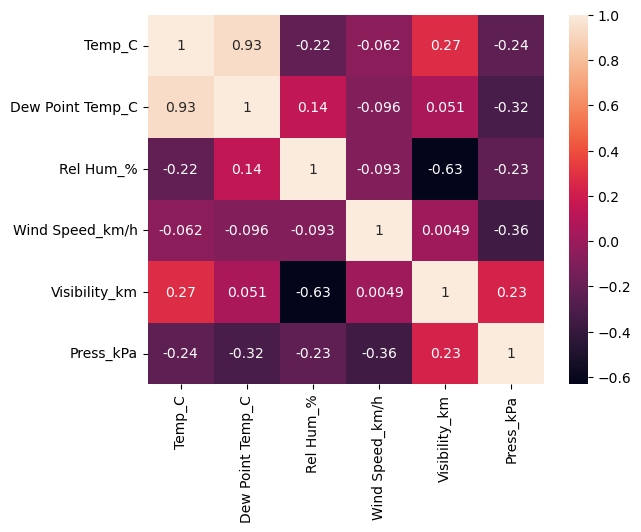

In [188]:
sns.heatmap(cor_matrix, annot =True)

In [189]:
weather_df.columns

Index(['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h',
       'Visibility_km', 'Press_kPa', 'Weather'],
      dtype='object')

<Axes: ylabel='Frequency'>

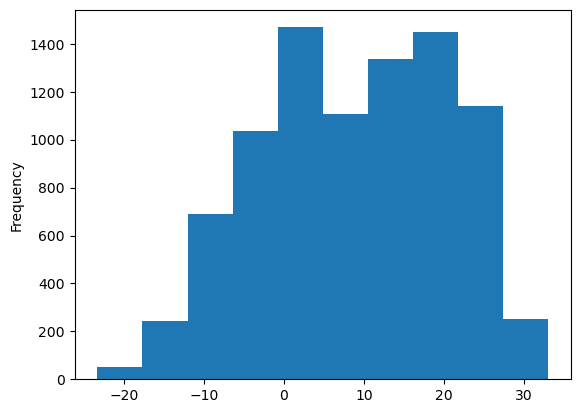

In [190]:
weather_df['Temp_C'].plot(kind = 'hist')

<Axes: ylabel='Frequency'>

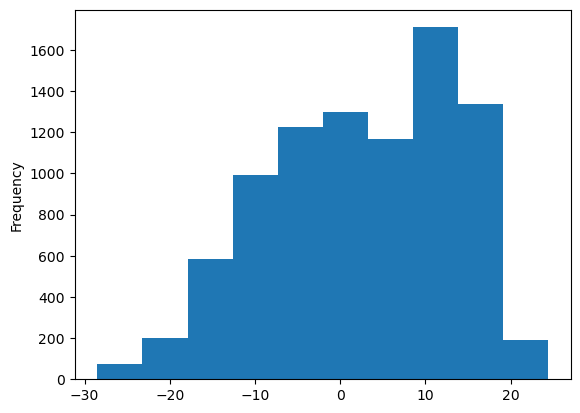

In [191]:
weather_df['Dew Point Temp_C'].plot(kind = 'hist')

<Axes: ylabel='Frequency'>

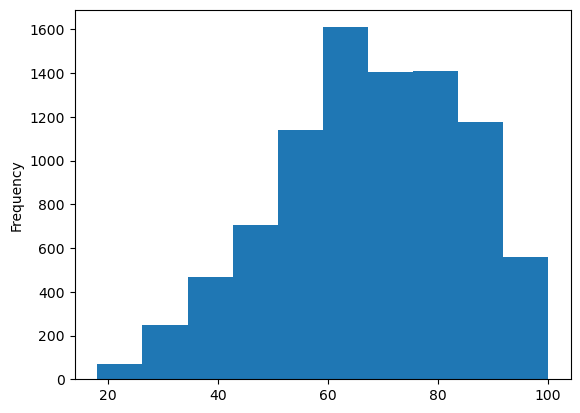

In [192]:
weather_df['Rel Hum_%'].plot(kind = 'hist')

<Axes: ylabel='Frequency'>

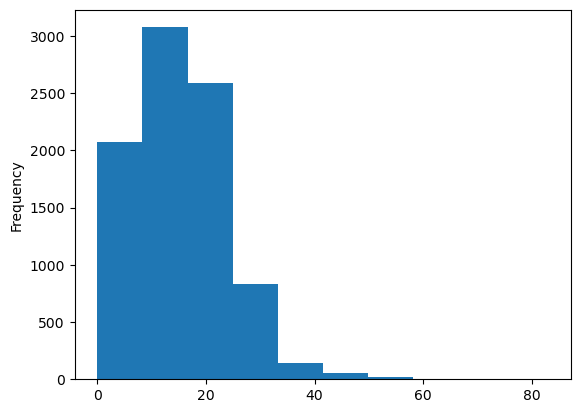

In [193]:
weather_df['Wind Speed_km/h'].plot(kind = 'hist')

<Axes: ylabel='Frequency'>

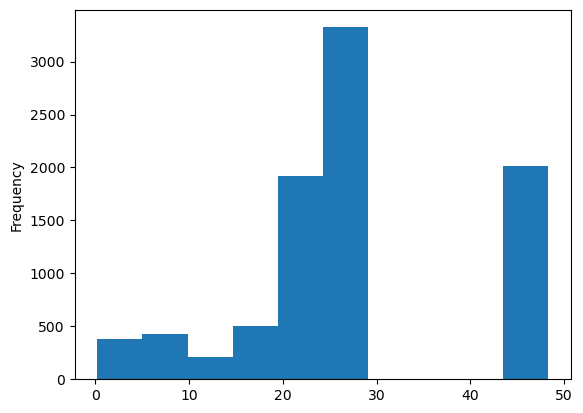

In [194]:
weather_df['Visibility_km'].plot(kind = 'hist')

<Axes: ylabel='Frequency'>

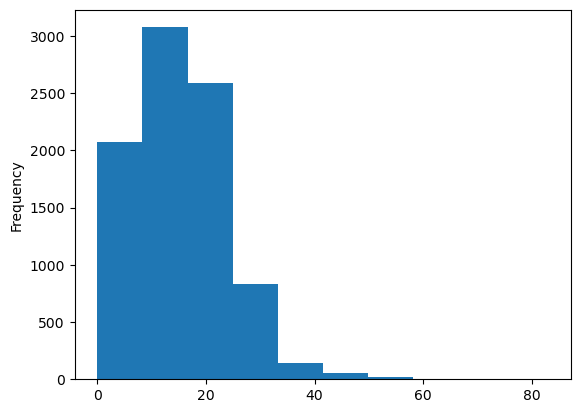

In [195]:
weather_df['Wind Speed_km/h'].plot(kind = 'hist')

<Axes: ylabel='Frequency'>

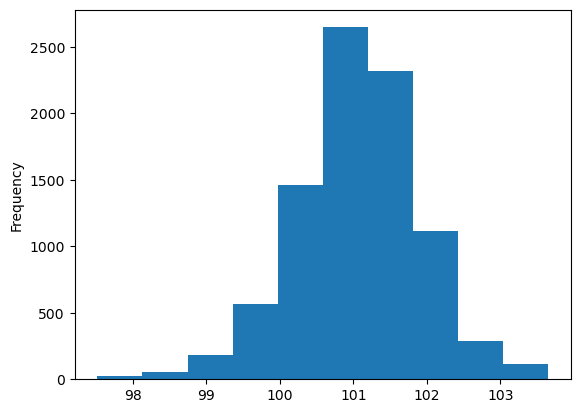

In [196]:
weather_df['Press_kPa'].plot(kind = 'hist')

In [197]:
weather_df.head()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,-1.8,-3.9,86,4,8.0,101.24,Fog/Visibility Issues
1,-1.8,-3.7,87,4,8.0,101.24,Fog/Visibility Issues
2,-1.8,-3.4,89,7,4.0,101.26,Fog/Visibility Issues
3,-1.5,-3.2,88,6,4.0,101.27,Fog/Visibility Issues
4,-1.5,-3.3,88,7,4.8,101.23,Fog/Visibility Issues


Converting weather values to numeric

In [199]:
from sklearn.preprocessing import LabelEncoder

In [200]:
label_Encoder = LabelEncoder()

In [201]:
weather_df['Weather'] = label_Encoder.fit_transform(weather_df['Weather'])

In [202]:
label_mapping = dict(zip(label_Encoder.classes_, range(len(label_Encoder.classes_))))
print(label_mapping)


{'Clear': 0, 'Cloudy': 1, 'Fog/Visibility Issues': 2, 'Freezing Precipitation': 3, 'Mixed Precipitation': 4, 'Rain': 5, 'Snow': 6, 'Thunderstorms': 7}


In [203]:
label_Encoder.classes_

array(['Clear', 'Cloudy', 'Fog/Visibility Issues',
       'Freezing Precipitation', 'Mixed Precipitation', 'Rain', 'Snow',
       'Thunderstorms'], dtype=object)

In [204]:
weather_df.head()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,-1.8,-3.9,86,4,8.0,101.24,2
1,-1.8,-3.7,87,4,8.0,101.24,2
2,-1.8,-3.4,89,7,4.0,101.26,2
3,-1.5,-3.2,88,6,4.0,101.27,2
4,-1.5,-3.3,88,7,4.8,101.23,2


In [205]:
weather_df.Weather.value_counts()

Weather
1    3838
0    3432
5     524
6     502
2     419
3      39
7      27
4       3
Name: count, dtype: int64

In [206]:
X = weather_df.drop(['Weather'], axis = 1)
X

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
0,-1.8,-3.9,86,4,8.0,101.24
1,-1.8,-3.7,87,4,8.0,101.24
2,-1.8,-3.4,89,7,4.0,101.26
3,-1.5,-3.2,88,6,4.0,101.27
4,-1.5,-3.3,88,7,4.8,101.23
...,...,...,...,...,...,...
8779,0.1,-2.7,81,30,9.7,100.13
8780,0.2,-2.4,83,24,9.7,100.03
8781,-0.5,-1.5,93,28,4.8,99.95
8782,-0.2,-1.8,89,28,9.7,99.91


In [207]:
y = weather_df['Weather']
y

0       2
1       2
2       2
3       2
4       2
       ..
8779    6
8780    6
8781    6
8782    6
8783    6
Name: Weather, Length: 8784, dtype: int32

In [208]:
y.values

array([2, 2, 2, ..., 6, 6, 6])

In [209]:
y.unique()

array([2, 1, 5, 0, 6, 3, 7, 4])

Preprocessing

In [211]:
from sklearn.preprocessing import StandardScaler

In [212]:
std_scaler = StandardScaler()

In [213]:
x_std = std_scaler.fit_transform(X)
x_std

array([[-0.90681502, -0.59318371,  1.09755264, -1.25980838, -1.55795388,
         0.22320647],
       [-0.90681502, -0.5748055 ,  1.15666157, -1.25980838, -1.55795388,
         0.22320647],
       [-0.90681502, -0.54723818,  1.27487942, -0.91451252, -1.87486163,
         0.24690437],
       ...,
       [-0.79558239, -0.37264519,  1.51131513,  1.5025585 , -1.81148008,
        -1.30530797],
       [-0.76991332, -0.40021251,  1.27487942,  1.5025585 , -1.42326809,
        -1.35270376],
       [-0.7528006 , -0.42777982,  1.09755264,  1.73275574, -1.29650499,
        -1.37640166]])

Dividing into Train and Test data

In [215]:
from sklearn.model_selection import train_test_split

In [216]:
x_train, x_test, y_train, y_test = train_test_split(x_std, y, test_size=0.2, random_state=42)

In [217]:
x_train.shape

(7027, 6)

In [218]:
x_test.shape

(1757, 6)

Using Decision tree algorithm

In [220]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_model = DecisionTreeClassifier()

In [221]:
decision_tree_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [222]:
y_pred_dt = decision_tree_model.predict(x_test)

In [223]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [224]:
accuracy_score(y_test, y_pred_dt)

0.6380193511667616

In [225]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.65      0.66      0.66       665
           1       0.64      0.65      0.65       781
           2       0.81      0.90      0.85        86
           3       0.27      0.33      0.30         9
           4       0.00      0.00      0.00         1
           5       0.36      0.32      0.34        99
           6       0.65      0.55      0.60       111
           7       0.25      0.20      0.22         5

    accuracy                           0.64      1757
   macro avg       0.45      0.45      0.45      1757
weighted avg       0.64      0.64      0.64      1757



C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<Axes: >

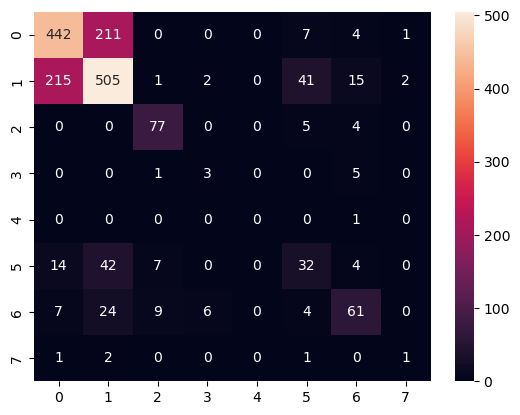

In [226]:
cm = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm, annot = True, fmt = 'd')

using Random Forest classifier algorithm

In [249]:
from sklearn.ensemble import RandomForestClassifier

In [251]:
rf_model = RandomForestClassifier()

In [253]:
rf_model.fit(x_train, y_train)

RandomForestClassifier()

In [254]:
y_pred_rf = rf_model.predict(x_test)

In [255]:
accuracy_score(y_test, y_pred_rf)

0.7228229937393283

In [256]:
classification_report(y_test, y_pred_rf)

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


'              precision    recall  f1-score   support\n\n           0       0.72      0.77      0.74       665\n           1       0.71      0.73      0.72       781\n           2       0.82      0.97      0.89        86\n           3       1.00      0.22      0.36         9\n           4       0.00      0.00      0.00         1\n           5       0.63      0.34      0.44        99\n           6       0.80      0.62      0.70       111\n           7       0.00      0.00      0.00         5\n\n    accuracy                           0.72      1757\n   macro avg       0.59      0.46      0.48      1757\nweighted avg       0.72      0.72      0.72      1757\n'

<Axes: >

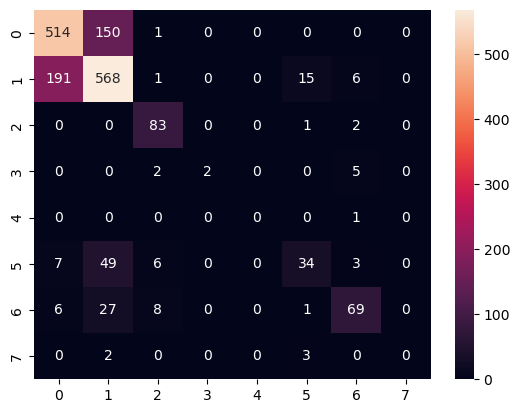

In [257]:
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot = True, fmt = 'd')

Using multiple algorithms and comparing them

In [263]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [264]:
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()
svc_model = SVC()
knn_model = KNeighborsClassifier()
lr_model = LogisticRegression()
nb_model = GaussianNB()

In [265]:
model_list = [dt_model, rf_model, svc_model, knn_model, lr_model, nb_model]

In [266]:
acc_list = []

for model in model_list:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    acc_list.append(acc)

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [267]:
acc_list

[0.6340352874217416,
 0.7182697780307342,
 0.6340352874217416,
 0.6619237336368811,
 0.618099032441662,
 0.5526465566306203]

In [272]:
model_df = pd.DataFrame({'Model': model_list, 'Accuracy': acc_list})
model_df

,Model,Accuracy
0,DecisionTreeClassifier(),0.634035
1,"(DecisionTreeClassifier(max_features='sqrt', r...",0.718270
2,SVC(),0.634035
3,KNeighborsClassifier(),0.661924
4,LogisticRegression(),0.618099
5,GaussianNB(),0.552647


Applying highest accurate Algorithm

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model1 = RandomForestClassifier(n_estimators=2000, random_state=32) # You can adjust n_estimators
rf_model1.fit(x_train, y_train)
y_pred_rf1 = rf_model.predict(x_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf1))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf1))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf1))

Predicting the weather

In [ ]:
label_mapping = dict(zip(label_Encoder.classes_, range(len(label_Encoder.classes_))))
print(label_mapping)


In [ ]:
input_dt = (-1.8,-3.9,86,4,8,101.24)

input_dt_as_np = np.asarray(input_dt)
input_dt_reshaped = input_dt_as_np.reshape(1,-1)
prediction = rf_model.predict(input_dt_reshaped)
if prediction == 0 :
    print('Clear')
elif prediction == 1:
    print('Cloudy')
elif prediction == 2:
    print('Fog/Visibility Issues')
elif prediction == 3:
    print('Freezing Precipitation')
elif prediction == 4:
    print('Mixed Precipitation')
elif prediction == 5:
    print('Rain')
elif prediction == 6:
    print('Snow')
else :
    print('Thunderstorms')

saving the model

In [ ]:
import pickle

In [ ]:
with open('rf_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

print("Model saved successfully!")